[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mfrashad/text2art/blob/main/text2art.ipynb)

In [1]:
#@title Setup
from google.colab import output

nvidia_output = !nvidia-smi --query-gpu=memory.total --format=noheader,nounits,csv
gpu_memory = int(nvidia_output[0])
if gpu_memory < 14000:
  output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')
  warning_string = f"--> GPU check: ONLY {gpu_memory} MiB available: Please use low quality or low res <--"
  print(warning_string)
  output.eval_js('alert("Warning - low GPU (see message)")')
else:
  print(f"GPU check: {gpu_memory} MiB available: this should be fine")

from IPython.utils import io
with io.capture_output() as captured:
  !pip install torch==1.9.0+cu102 torchtext==0.10.0 torchvision==0.10.0+cu102 torch-optimizer==0.1.0 -f https://download.pytorch.org/whl/torch/ -f https://download.pytorch.org/whl/torchvision/
  !git clone https://github.com/openai/CLIP
  # !pip install taming-transformers
  !git clone https://github.com/CompVis/taming-transformers.git
  !rm -Rf clipit
  !git clone https://github.com/mfrashad/clipit.git
  !pip install ftfy regex tqdm omegaconf pytorch-lightning
  !pip install kornia==0.6.1
  !pip install imageio-ffmpeg   
  !pip install einops
  !pip install torch-optimizer
  !pip install easydict
  !pip install braceexpand
  !pip install git+https://github.com/pvigier/perlin-numpy

  # ClipDraw deps
  !pip install svgwrite
  !pip install svgpathtools
  !pip install cssutils
  !pip install numba
  !pip install torch-tools
  !pip install visdom

  !pip install gradio==2.3.7

  !git clone https://github.com/BachiLi/diffvg
  %cd diffvg
  # !ls
  !git submodule update --init --recursive
  !python setup.py install
  %cd ..
  
  !mkdir -p steps
  !mkdir -p models

output.clear()
import sys
sys.path.append("clipit")

result_msg = "setup complete"
import IPython
import os
if not os.path.isfile("first_init_complete"):
  # put stuff in here that should only happen once
  !mkdir -p models
  os.mknod("first_init_complete")
  result_msg = "Please choose Runtime -> Restart Runtime from the menu, and then run Setup again"

js_code = f'''
document.querySelector("#output-area").appendChild(document.createTextNode("{result_msg}"));
'''
js_code += '''
for (rule of document.styleSheets[0].cssRules){
  if (rule.selectorText=='body') break
}
rule.style.fontSize = '30px'
'''
display(IPython.display.Javascript(js_code))

<IPython.core.display.Javascript object>

## VQGAN + CLIP

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2809856/45929032 bytes (6.1%)6438912/45929032 bytes (14.0%)9994240/45929032 bytes (21.8%)14106624/45929032 bytes (30.7%)17833984/45929032 bytes (38.8%)21585920/45929032 bytes (47.0%)25346048/45929032 bytes (55.2%)29466624/45929032 bytes (64.2%)33472512/45929032 bytes (72.9%)37437440/45929032 bytes (81.5%)41443328/45929032 bytes (90.2%)45342720/45929032 bytes (98.7%)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

8.19kB [00:00, 492kB/s]                    


loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from models/vqgan_imagenet_f16_16384.ckpt


100%|███████████████████████████████████████| 338M/338M [00:04<00:00, 78.7MiB/s]
100%|███████████████████████████████████████| 335M/335M [00:03<00:00, 95.0MiB/s]


Using device: cuda:0
Optimising using: Adam
Using text prompts: ['underwater city']
Using seed: 5554973939831806938


0it [00:00, ?it/s]

iter: 0, loss: 1.87, losses: 0.942931, 0.927064


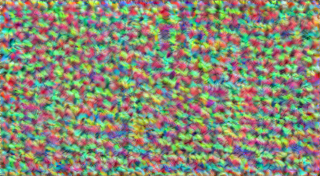

iter: 10, loss: 1.61124, losses: 0.804517, 0.80672
iter: 20, loss: 1.49996, losses: 0.746329, 0.753628


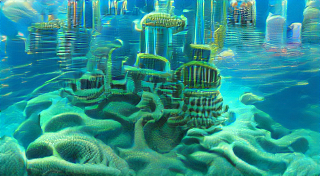

In [2]:
import clipit
# To reset settings to default
clipit.reset_settings()
# You can use "|" to separate multiple prompts
prompts = "underwater city"
# You can trade off speed for quality: draft, normal, better, best
quality = "normal"
# Aspect ratio: widescreen, square
aspect = "widescreen"
# Add settings
clipit.add_settings(prompts=prompts, quality=quality, aspect=aspect)
# Apply these settings and run
settings = clipit.apply_settings()
clipit.do_init(settings)
clipit.do_run(settings)

Code Section


In [3]:
!pip install fastapi nest-asyncio pyngrok uvicorn aiofiles python-multipart firebase-admin

     |████████████████████████████████| 53 kB 1.6 MB/s 
     |████████████████████████████████| 745 kB 9.9 MB/s 
     |████████████████████████████████| 53 kB 2.4 MB/s 
     |████████████████████████████████| 10.9 MB 49.8 MB/s 
     |████████████████████████████████| 58 kB 6.0 MB/s 
     |████████████████████████████████| 79 kB 8.3 MB/s 
     |████████████████████████████████| 58 kB 7.1 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=408d54ee9b7b7eb322a2c9313895bdc56a2934fc54d9209714b18a0e51b569f1
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none-any.whl size=31678 sha256=884fe955e7bff8d3fb79ccfe2f4d14a70c3132841933afd5ee3bd33249b8e328
  Stored in directory: /root/.cache/pip/wheels/2c/41/7c/bfd1c180534ffdcc0972f78c5758f89881602175d48a8bcd2c
Successfully built pyngrok python-multipart


In [ ]:
#@title MailGun function

import requests
def email_results_mailgun(email, prompt):
  
    return requests.post(
        "https://api.mailgun.net/v3/text2art.com/messages",
        auth=("api", "YOUR_API_KEY"),
        files=[("attachment",("output.png", open("output.png", "rb").read() )),
               ("attachment", ("output.mp4", open("output.mp4", "rb").read() ))],
        data={"from": "Text2Art <hello@text2art.com>",
              "to": email,
              "subject": "Your Artwork is ready!",
              "text": f'Your generated arts using the prompt "{prompt}".',
              "html": f'Your generated arts using the prompt <strong>"{prompt}"</strong>.'})

In [ ]:
import sys
sys.path.append("clipit")

Please Upload your Firebase credentials json file

In [ ]:
#@title Define generate function
import torch
import clipit
from datetime import datetime

import firebase_admin
from firebase_admin import credentials, firestore, storage

if not firebase_admin._apps:
    cred = credentials.Certificate("YOUR_CREDENTIAL")
    firebase_admin.initialize_app(cred, {
        'storageBucket': 'YOUR_BUCKET_URL'
    })

db = firestore.client()
bucket = storage.bucket()

def generate(doc_id, init_image, prompt, quality, style, aspect, email, public):
    torch.cuda.empty_cache()
    clipit.reset_settings()
    if init_image == '':
        init_image = None
    use_pixeldraw = (style == 'pixel art')
    use_clipdraw = (style == 'painting')
    seed = int(datetime.now().timestamp())
    enforce_smoothness = 50 if use_pixeldraw else 0
    enforce_saturation=1000 if use_pixeldraw else 0
    enforce_smoothness_type='log' if use_pixeldraw else 'default'
    clipit.add_settings(prompts=prompt,
                        init_image=init_image,
                        seed=seed,
                        aspect=aspect,
                        quality=quality,
                        scale=2.5,
                        display_every=7919,
                        use_pixeldraw=use_pixeldraw,
                        use_clipdraw=use_clipdraw,
                        enforce_smoothness=enforce_smoothness,
                        enforce_saturation=enforce_saturation,
                        enforce_smoothness_type=enforce_smoothness_type,
                        make_video=True)
    
    settings = clipit.apply_settings()
    clipit.do_init(settings)
    clipit.do_run(settings)
    # watermark_image('output.png', 'output.png')


    # image_blob = bucket.blob(f'generated_images/{doc_id}.png')
    # image_blob.upload_from_filename('output.png')
    # image_blob.make_public()

    # video_blob = bucket.blob(f'generated_videos/{doc_id}.mp4')
    # video_blob.upload_from_filename('output.mp4')
    # video_blob.make_public()

    # data = {
    #     "image": image_blob.public_url,
    #     "video": video_blob.public_url,
    #     "seed": seed,
    #     "prompt": prompt,
    #     "quality": quality,
    #     "aspect": aspect,
    #     "type": style,
    #     "user": email,
    #     "likes": 0,
    #     "public": public,
    #     "created_at": datetime.now()
    # }
    # db.collection('generated_images').document(doc_id).set(data)
    #email_results_sendgrid(email, prompt)
    email_results_mailgun(email, prompt)
    # db.collection('emails').document(email).set({})

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2220032/45929032 bytes (4.8%)5267456/45929032 bytes (11.5%)8413184/45929032 bytes (18.3%)11444224/45929032 bytes (24.9%)14630912/45929032 bytes (31.9%)17801216/45929032 bytes (38.8%)20914176/45929032 bytes (45.5%)24133632/45929032 bytes (52.5%)27418624/45929032 bytes (59.7%)30482432/45929032 bytes (66.4%)33677312/45929032 bytes (73.3%)36675584/45929032 bytes (79.9%)

In [ ]:
#@title Worker
import firebase_admin
from firebase_admin import credentials, storage, firestore
import time
from datetime import datetime


transaction = db.transaction()

@firestore.transactional
def claim_task(transaction, queue_objects_ref):
    # query firestore
    queue_objects = queue_objects_ref.stream(transaction=transaction)

    # pull the document from the iterable
    next_item = None
    for doc in queue_objects:
        next_item = doc

    # if queue is empty return status code of 2
    if not next_item:
        return {"status": 2}


    # get information from the document 
    next_item_data = next_item.to_dict()
    next_item_data["status"] = 0
    next_item_data['id'] = next_item.id

    # delete the document and return the information
    transaction.delete(next_item.reference)
    return next_item_data

# initialize query
queue_objects_ref = (
    db.collection("queue")
    .order_by("created_at", direction="ASCENDING")
    .limit(1)
)

transaction_attempts = 0
while True:
    try:
        # apply transaction
        next_item_data = claim_task(transaction, queue_objects_ref)
        if next_item_data['status'] == 0:
            generate(next_item_data['id'],
                     next_item_data['init_image'],
                     next_item_data['prompt'],
                     next_item_data['quality'],
                     next_item_data['type'],
                     next_item_data['aspect'],
                     next_item_data['email'],
                     next_item_data['public'])
            print(f"Generated {next_item_data['prompt']} for {next_item_data['email']}")

    except Exception as e:
        print(f"Could not apply transaction. Error: {e}")
        time.sleep(5)
        transaction_attempts += 1
        if transaction_attempts > 20:
            db.collection("errors").add({
                "exception": f"Could not apply artifaication claim transaction. Error: {e}",
                "location": "Claim artifaication",
                "time": str(datetime.now())
            })
            exit()

In [4]:
import clipit
import torch
from fastapi import FastAPI
from fastapi.middleware.cors import CORSMiddleware
from fastapi import FastAPI, File, UploadFile, Form, BackgroundTasks
from fastapi.responses import FileResponse
from pydantic import BaseModel

class Test(BaseModel):
  seed: int = None
  iterations: int = None
  prompts: str = "Underwater City"
  quality: str ="draft"
  aspect: str = "square"
  scale: float =2.5
  style: str = 'image'
  make_video: bool = False  

app = FastAPI()

app.add_middleware(
    CORSMiddleware,
    allow_origins=['*'],
    allow_credentials=True,
    allow_methods=['*'],
    allow_headers=['*'],
)

@app.get('/')
async def root():
    return {'hello': 'world'}

@app.post("/test")
async def test( test:Test ):
  print(test.prompts)
  return test.prompts

@app.post("/generate")
async def generate(
         test:Test
    ):
    
    
    torch.cuda.empty_cache()
    clipit.reset_settings()

    use_pixeldraw = (test.style == 'Pixel Art')
    use_clipdraw = (test.style == 'Painting')
    clipit.add_settings(prompts=test.prompts,
                        seed=test.seed,
                        iterations=test.iterations,
                        aspect=test.aspect,
                        quality=test.quality,
                        scale=test.scale,
                        use_pixeldraw=use_pixeldraw,
                        use_clipdraw=use_clipdraw,
                        make_video=test.make_video)
    
    settings = clipit.apply_settings()
    clipit.do_init(settings)
    clipit.do_run(settings)

    return FileResponse('output.png', media_type="image/png")

Public URL: http://8208-35-196-0-137.ngrok.io
Doc URL: http://8208-35-196-0-137.ngrok.io/docs


INFO:     Started server process [1102]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     2405:201:4018:5241:1dcb:25ac:71aa:9345:0 - "GET / HTTP/1.1" 200 OK
INFO:     2405:201:4018:5241:1dcb:25ac:71aa:9345:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     2405:201:4018:5241:1dcb:25ac:71aa:9345:0 - "OPTIONS /generate HTTP/1.1" 200 OK
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from models/vqgan_imagenet_f16_16384.ckpt
Using device: cuda:0
Optimising using: Adam
Using text prompts: ['Underwater City']
Using seed: 744134433426703072


0it [00:00, ?it/s]

iter: 0, loss: 0.938705, losses: 0.938705


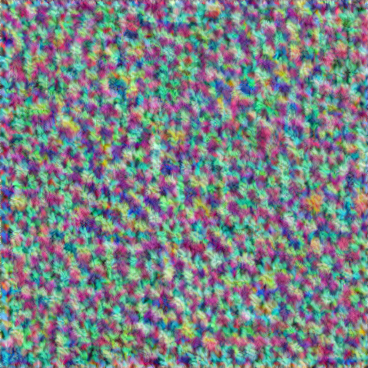

iter: 10, loss: 0.773221, losses: 0.773221
INFO:     2405:201:4018:5241:1dcb:25ac:71aa:9345:0 - "POST /generate HTTP/1.1" 200 OK
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from models/vqgan_imagenet_f16_16384.ckpt
Using device: cuda:0
Optimising using: Adam
Using text prompts: ['Underwater Bridge']
Using seed: 13137626015587787425


0it [00:00, ?it/s]

iter: 0, loss: 0.967102, losses: 0.967102


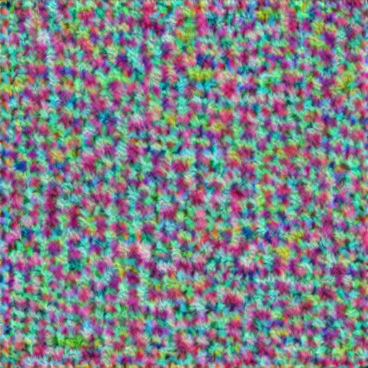

iter: 10, loss: 0.845039, losses: 0.845039
INFO:     2405:201:4018:5241:1dcb:25ac:71aa:9345:0 - "POST /generate HTTP/1.1" 200 OK
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from models/vqgan_imagenet_f16_16384.ckpt
Using device: cuda:0
Optimising using: Adam
Using text prompts: ['water bridge']
Using seed: 1334811221254930911


0it [00:00, ?it/s]

iter: 0, loss: 0.947205, losses: 0.947205


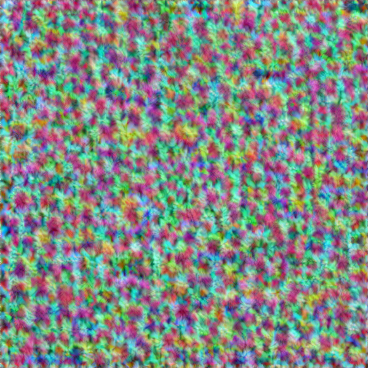

iter: 10, loss: 0.860946, losses: 0.860946
INFO:     2405:201:4018:5241:1dcb:25ac:71aa:9345:0 - "POST /generate HTTP/1.1" 200 OK


In [ ]:
#@title Default title text
import nest_asyncio
from pyngrok import ngrok
import uvicorn

ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
print('Doc URL:', ngrok_tunnel.public_url+'/docs')
nest_asyncio.apply()
uvicorn.run(app, port=8000)

# New Section